<a href="https://colab.research.google.com/github/Sujal-Mishra/DataCrimes/blob/main/CrimeScope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIPTION

This notebook performs an Exploratory Data Analysis (EDA) on a dataset related to crimes against women in India. The analysis begins with understanding the dataset structure and column definitions using the provided description file, followed by data cleaning and preprocessing. State-wise aggregation is carried out to identify regions with the highest reported crimes against women. Visualizations such as bar charts and heatmaps are used to highlight overall trends and crime-type dominance across states. Additionally, clustering techniques are applied to group states based on similar crime patterns, enabling comparative analysis. The objective of this notebook is to extract meaningful insights from the data and understand regional variations in crime patterns without applying any predictive machine learning models.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:

crime_df = pd.read_csv("CrimesOnWomenData.csv")
desc_df = pd.read_csv("description.csv")
desc_df.head()
crime_df.head()


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [5]:

crime_df = crime_df[~crime_df['State'].str.contains("Total", na=False)]
crime_cols = crime_df.columns[2:]
crime_df[crime_cols] = crime_df[crime_cols].apply(pd.to_numeric, errors='coerce')
crime_df.fillna(0, inplace=True)
state_crime = crime_df.groupby("State")[crime_cols].sum()
state_crime["Total_Crime"] = state_crime.sum(axis=1)
state_crime.head()


,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Crime
State,,,,,,,,,
A & N ISLANDS,20055,84,58,4,182,36,111,0,20530
A & N Islands,22176,340,305,9,376,99,254,10,23569
ANDHRA PRADESH,20055,10696,11921,5112,42334,28759,92242,17,211136
ARUNACHAL PRADESH,20055,412,440,1,666,16,123,0,21713
ASSAM,20055,12762,16368,1015,10587,99,27735,4,88625


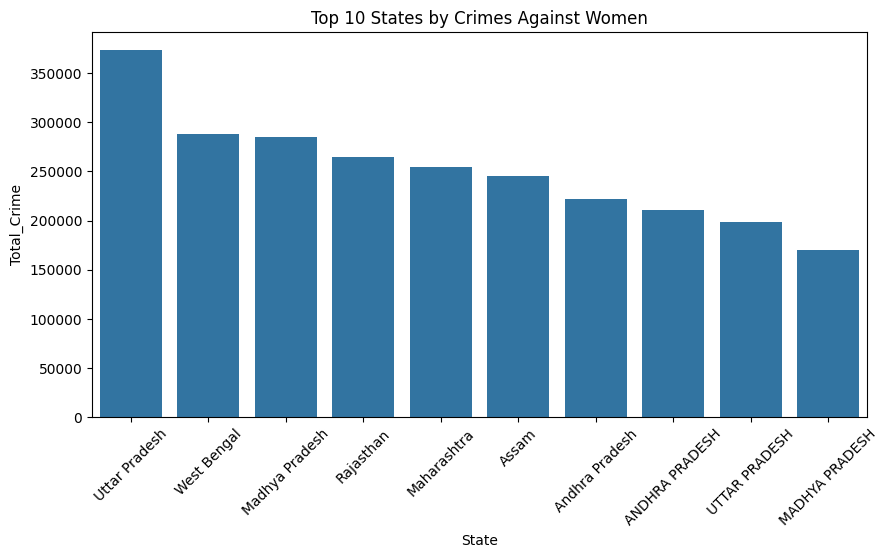

In [9]:

top_states = state_crime.sort_values("Total_Crime", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states["Total_Crime"])
plt.xticks(rotation=45)
plt.title("Top 10 States by Crimes Against Women")
plt.show()


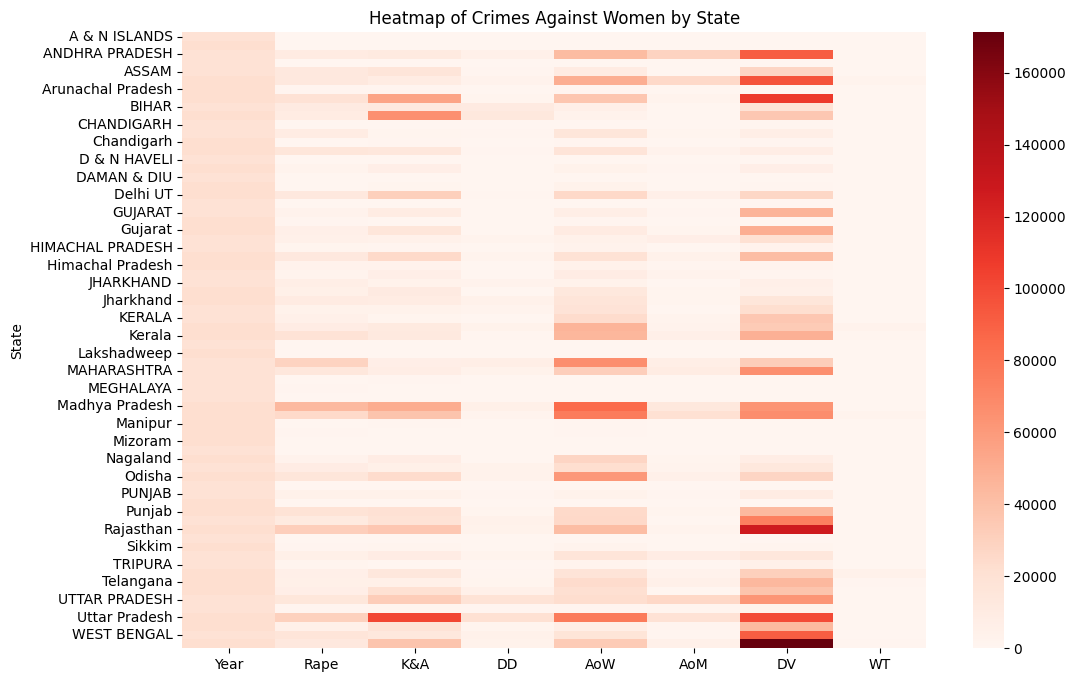

In [10]:

plt.figure(figsize=(12,8))
sns.heatmap(state_crime[crime_cols], cmap="Reds")
plt.title("Heatmap of Crimes Against Women by State")
plt.show()


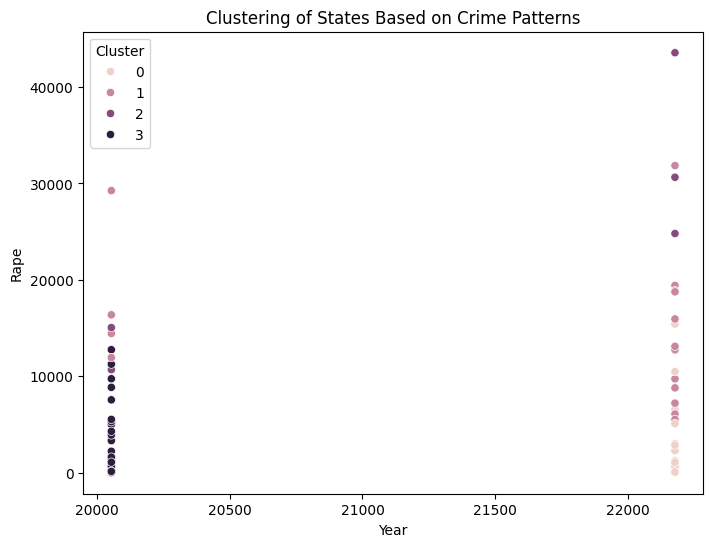

In [8]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_crime[crime_cols])
kmeans = KMeans(n_clusters=4, random_state=42)
state_crime["Cluster"] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=state_crime.iloc[:,0], y=state_crime.iloc[:,1], hue=state_crime["Cluster"])
plt.title("Clustering of States Based on Crime Patterns")
plt.show()
